In [85]:
%run PlottingSetup.ipynb
%matplotlib inline

Host 0.6643073901612342
Device 5.312453215422477
Device 2.098083e-05


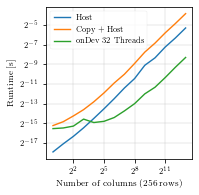

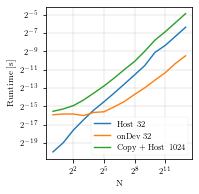

In [136]:
filename='fp_ew2d128th.txt'
data128 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='fp_ew2d64th.txt'
data64 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='fp_ew2d32th.txt'
data32 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='fp_ew2d512th.txt'
data512 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
row_fixed_data=data32[data32[:,0]==2048]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3],label='Host')
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3]+row_fixed_data[:,4]+row_fixed_data[:,5],label='Copy + Host')
row_fixed_data=data32[data32[:,0]==2048]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onDev 32 Threads')

print('Host',row_fixed_data[-1,1]*2048/row_fixed_data[-1,3]/1e9)
print('Device',row_fixed_data[-1,1]*2048/row_fixed_data[-1,2]/1e9)
print('Device',row_fixed_data[0,2])


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of columns (256 rows)')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.2,bottom=.15)
save('EW2D_rowsfixed')

fig, ax = plt.subplots()

# plot functions, time
col_fixed_data=data32[data32[:,1]==1024]
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3],label='Host 32')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,2],label='onDev 32')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3]+col_fixed_data[:,4]+col_fixed_data[:,5],label='Copy + Host 1024')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.2,bottom=.15)
save('EW2D_colsfixed')



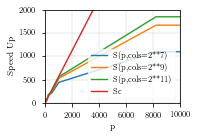

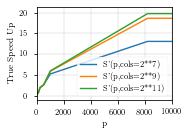

In [120]:
data = np.genfromtxt('fp_ew2d_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b

row_fixed_data=data[data[:,0]==512]
fig, ax = plt.subplots()
speedups=[]
for length in np.unique(row_fixed_data[:,1]):
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2],len_data[:,3]/len_data[:,5],label="S(p,cols=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,3]/len_data[:,5]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,2]<100])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    
ax.plot(len_data[:,2],linear_func(len_data[:,2],*su_popt),label='Sc')

ax.set_xlim(0,10000)
ax.set_ylim(0,2000)


ax.set_ylabel('Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='lower right')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('EW2DSpeedUp')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(row_fixed_data[:,1]):
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2],len_data[:,4]/len_data[:,5],label="S'(p,cols=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,4]/len_data[:,5]]

ax.set_xlim(0,10000)
# ax.set_ylim(0,6)



ax.set_ylabel('True Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='lower right')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('EW2DTrueSpeedUp')


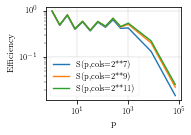

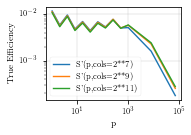

In [127]:
row_fixed_data=data[data[:,0]==512]
fig, ax = plt.subplots()
speedups=[]
for length in np.unique(row_fixed_data[:,1]):
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2],len_data[:,3]/len_data[:,5]/len_data[:,2],label="S(p,cols=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,3]/len_data[:,5]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,2]<100])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    


ax.set_ylabel('Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend(loc='lower left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('EW2DEfficiency')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(row_fixed_data[:,1]):
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2],len_data[:,4]/len_data[:,5]/len_data[:,2],label="S'(p,cols=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,4]/len_data[:,5]]



ax.set_ylabel('True Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend(loc='lower left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('EW2DTrueEfficiency')

uhost latenz 1.597404e-05
Softmax True Speed Up 6.576671753013143


/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


0.32856795489811214

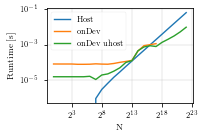

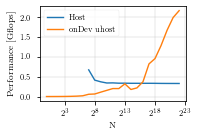

In [165]:
data_dev = np.genfromtxt('softmax_times_naive_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
data_sgpu = np.genfromtxt('softmax_times_sgpu_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_sgpu[:,0],data_sgpu[:,2],label='Host')
ax.plot(data_dev[:,0],data_dev[:,1],label='onDev')
ax.plot(data_sgpu[:,0],data_sgpu[:,1],label='onDev uhost')
# ax.plot(data_sgpu[:,0],data_sgpu[:,2]+data_sgpu[:,5]+data_sgpu[:,6],label='Copy + Host')
print('uhost latenz',data_sgpu[0,1])
print('Softmax True Speed Up',data_sgpu[-1,2]/data_sgpu[-1,1])


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('Softmax')


fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_sgpu[:,0],5*data_sgpu[:,0]/data_sgpu[:,2]/1e9,label='Host')
ax.plot(data_sgpu[:,0],5*data_sgpu[:,0]/data_sgpu[:,1]/1e9,label='onDev uhost')


ax.set_ylabel('Performance [Gflops]')
# ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('SoftmaxPerf')

5*data_sgpu[-1,0]/data_sgpu[-1,2]/1e9


latenz d_softmax 1.692772e-05
D_softmax True Speed Up 4.772319743936827


/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


array([9.96440742e-07, 2.23682611e-06, 8.51095295e-06, 1.06539452e-05,
       3.85019312e-05, 5.30988091e-05, 1.19153355e-04, 2.54524334e-04,
       5.03727895e-04, 9.31680177e-04, 1.11725600e-03, 1.41265640e-03,
       9.42683575e-04, 1.17888392e-03, 4.26956818e-03, 7.61548469e-03,
       1.18520263e-02, 1.16112656e-02, 1.47343608e-02])

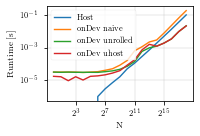

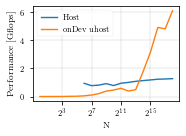

In [170]:
data_dnaive = np.genfromtxt('softmax_times_dnaive_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
data_unrolled = np.genfromtxt('softmax_times_dunrolled_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
data_duhost = np.genfromtxt('softmax_times_duhost_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_dnaive[:,0],data_dnaive[:,8],label='Host')
ax.plot(data_dnaive[:,0],data_dnaive[:,7],label='onDev naive')
# ax.plot(data_dnaive[:,0],data_dnaive[:,8]+data_dnaive[:,5]+data_dnaive[:,6],label='Copy+Host')
ax.plot(data_unrolled[:,0],data_unrolled[:,7],label='onDev unrolled')
ax.plot(data_duhost[:,0],data_duhost[:,7],label='onDev uhost')

print('latenz d_softmax',data_duhost[0,7])
print('D_softmax True Speed Up',data_duhost[-1,8]/data_duhost[-1,7])


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('D_Softmax')

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_dnaive[:,0],(data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_dnaive[:,8]/1e9,label='Host')
ax.plot(data_duhost[:,0],(data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_duhost[:,7]/1e9,label='onDev uhost')


ax.set_ylabel('Performance [Gflops]')
# ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('D_SoftmaxPerf')

(data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_duhost[:,7]/1e9/415

BB latenz 1.811981e-05
BB True Speed Up 12.926860153581014


/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


array([1.19685289e-06, 2.15666444e-06, 5.05337911e-06, 1.21999364e-05,
       3.03202746e-05, 7.73859746e-05, 2.02135164e-04, 4.92099350e-04,
       1.14521137e-03, 2.27568748e-03, 2.27017396e-03, 1.71098063e-03,
       3.90875528e-03, 3.75455628e-03, 1.26726361e-02, 1.63345327e-02,
       2.16789502e-02, 2.17185802e-02, 2.62989781e-02])

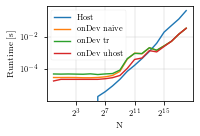

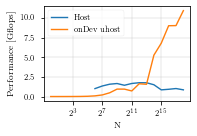

In [174]:
data_naive = np.genfromtxt('softmax_times_bbnaive_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
data_bbtr = np.genfromtxt('softmax_times_bbtr_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
data_bbuhost = np.genfromtxt('softmax_times_bbuhost_kernel.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_naive[:,0],data_naive[:,4],label='Host')
ax.plot(data_naive[:,0],data_naive[:,3],label='onDev naive')
ax.plot(data_bbtr[:,0],data_bbtr[:,3],label='onDev tr')
ax.plot(data_bbuhost[:,0],data_bbuhost[:,3],label='onDev uhost')
# ax.plot(data_naive[:,0],data_naive[:,4]+2*data_naive[:,5]+data_naive[:,6],label='Copy + Host')

print('BB latenz',data_bbuhost[0,3])
print('BB True Speed Up',data_bbuhost[-1,4]/data_bbuhost[-1,3])


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('SoftmaxBP')

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data_naive[:,0],(2*data_naive[:,0]**(3/2)+data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_naive[:,4]/1e9,label='Host')
ax.plot(data_bbuhost[:,0],(2*data_naive[:,0]**(3/2)+data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_bbuhost[:,3]/1e9,label='onDev uhost')



ax.set_ylabel('Performance [Gflops]')
# ax.set_yscale('log',basey=10)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('SoftmaxBPPerf')

(2*data_naive[:,0]**(3/2)+data_dnaive[:,0]*(1+np.sqrt(data_dnaive[:,0]))+5*data_dnaive[:,0])/data_bbuhost[:,3]/1e9/415

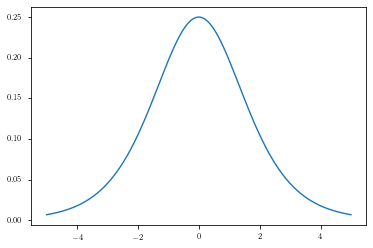

In [63]:
def d_sig(x):
    return np.exp(-x)/(1+np.exp(-x))**2

plt.plot(np.arange(-5,5,.001),d_sig(np.arange(-5,5,.001)))

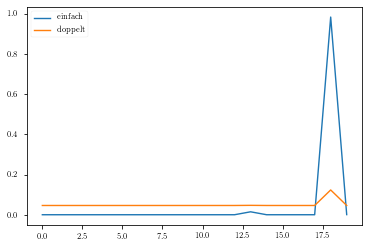

In [79]:
def softmax(x):
    return np.exp(x)/np.exp(x).sum()

length=20
inputs=100*np.random.random(length)
plt.plot(np.arange(length),softmax(inputs),label='einfach')
plt.plot(np.arange(length),softmax(softmax(inputs)),label='doppelt')
plt.legend()
plt.show()